# Comienza el análisis ETL USER REVIEWS

Primero, importo las librerias necesarias para hacer el respectivo análisis.

In [1]:
import pandas as pd
from textblob import TextBlob
import time
import string

Se construye un Dataframe, leyendo el archivo 'user_reviews'

In [2]:

df=pd.read_csv('user_reviews.csv')

Se procede a prescindir de la columna 'posted'

In [3]:
df.dropna(subset = ['posted'], inplace= True)

Eliminación de duplicados

In [4]:
df.drop_duplicates()

,user_id,user_url,0,funny,helpful,item_id,last_edited,posted,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,1250.0,NaN,"Posted November 5, 2011.",True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,22200.0,NaN,"Posted July 15, 2011.",True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,43110.0,NaN,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,15 of 20 people (75%) found this review helpful,251610.0,NaN,"Posted June 24, 2014.",True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,0 of 1 people (0%) found this review helpful,227300.0,NaN,"Posted September 8, 2013.",True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,No ratings yet,70.0,NaN,Posted July 10.,True,a must have classic from steam definitely wort...
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,No ratings yet,362890.0,NaN,Posted July 8.,True,this game is a perfect remake of the original ...
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,1 person found this review funny,1 of 2 people (50%) found this review helpful,273110.0,NaN,Posted July 3.,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,No ratings yet,730.0,NaN,Posted July 20.,True,:D


Vamos a ver a continuación que contiene la columna 'review'

In [5]:
df['review']

0        Simple yet with great replayability. In my opi...
1                     It's unique and worth a playthrough.
2        Great atmosphere. The gunplay can be a bit chu...
3        I know what you think when you see this title ...
4        For a simple (it's actually not all that simpl...
                               ...                        
59328    a must have classic from steam definitely wort...
59329    this game is a perfect remake of the original ...
59330    had so much fun plaing this and collecting res...
59331                                                   :D
59332                                       so much fun :D
Name: review, Length: 59305, dtype: object

Convertiendo la columna 'review' en una columna de tipo str

In [6]:
df['review'] = df['review'].astype(str)

Haciendo un análisis de sentimiento, la nube de palabras puede ayudarte a identificar las palabras más asociadas con sentimientos positivos, negativos o neutros en un conjunto de texto

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


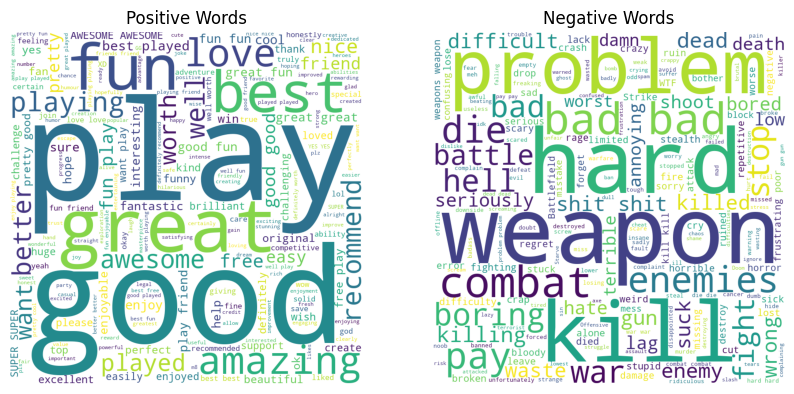

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

nltk.download('punkt')

def generate_wordcloud_from_dataframe(df, column_name):
    # Obtener el texto de la columna especificada
    text = ' '.join(df[column_name].astype(str).tolist())
    
    # Tokenizar el texto
    tokens = word_tokenize(text)
    
    # Crear el analizador de sentimientos
    sia = SentimentIntensityAnalyzer()
    
    # Inicializar listas para almacenar palabras clasificadas por el analizador de sentimientos
    positive_words = []
    negative_words = []
    
    # Clasificar las palabras en positivas y negativas según el análisis de sentimientos
    for word in tokens:
        score = sia.polarity_scores(word)
        if score['compound'] >= 0.05:
            positive_words.append(word)
        elif score['compound'] <= -0.05:
            negative_words.append(word)
    
    # Crear la nube de palabras para palabras positivas
    positive_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(positive_words))
    
    # Crear la nube de palabras para palabras negativas
    negative_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(negative_words))
    
    # Visualizar las nubes de palabras
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud) 
    plt.axis("off") 
    plt.title('Positive Words')
    
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud) 
    plt.axis("off") 
    plt.title('Negative Words')
    
    plt.show()


# Generar la nube de palabras
generate_wordcloud_from_dataframe(df, 'review')

Definimos una función llamada analyze_sentiment que utiliza la biblioteca TextBlob para analizar el sentimiento de un texto dado. La función calcula la polaridad del sentimiento del texto y luego asigna una etiqueta de sentimiento basada en esta polaridad. Si la polaridad es positiva, la etiqueta es 2; si es negativa, la etiqueta es 0; y si es neutra, la etiqueta es 1. Este análisis se puede aplicar a cualquier texto para clasificar su sentimiento como positivo, negativo o neutro.

In [12]:
import pandas as pd
from textblob import TextBlob

# Define la función de análisis de sentimiento
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_polarity = analysis.sentiment.polarity

    # Determinar el sentimiento basado en la polaridad
    if sentiment_polarity > 0:
        sentiment = 2
    elif sentiment_polarity < 0:
        sentiment = 0
    else:
        sentiment = 1

    return sentiment_polarity, sentiment

Aplicamos la función analyze_sentiment a cada elemento de la columna 'review' de un DataFrame df, calculando la polaridad del sentimiento y asignando una etiqueta de sentimiento correspondiente. Luego, crea dos nuevas columnas en el DataFrame df: 'polarity', que contiene los valores de polaridad del sentimiento, y 'sentiment', que contiene las etiquetas de sentimiento (0 para negativo, 1 para neutro y 2 para positivo) basadas en la polaridad calculada.

In [13]:

df['polarity'], df['sentiment'] = zip(*df['review'].apply(analyze_sentiment))

Revisando el Dataframe

In [14]:
df

,user_id,user_url,0,funny,helpful,item_id,last_edited,posted,recommend,review,polarity,sentiment
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,1250.0,NaN,"Posted November 5, 2011.",True,Simple yet with great replayability. In my opi...,0.174444,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,22200.0,NaN,"Posted July 15, 2011.",True,It's unique and worth a playthrough.,0.337500,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,NaN,No ratings yet,43110.0,NaN,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chu...,0.050000,2
3,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,15 of 20 people (75%) found this review helpful,251610.0,NaN,"Posted June 24, 2014.",True,I know what you think when you see this title ...,0.114583,2
4,js41637,http://steamcommunity.com/id/js41637,NaN,NaN,0 of 1 people (0%) found this review helpful,227300.0,NaN,"Posted September 8, 2013.",True,For a simple (it's actually not all that simpl...,-0.036111,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,No ratings yet,70.0,NaN,Posted July 10.,True,a must have classic from steam definitely wort...,0.233333,2
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,NaN,NaN,No ratings yet,362890.0,NaN,Posted July 8.,True,this game is a perfect remake of the original ...,0.142500,2
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,1 person found this review funny,1 of 2 people (50%) found this review helpful,273110.0,NaN,Posted July 3.,True,had so much fun plaing this and collecting res...,0.087500,2
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,NaN,NaN,No ratings yet,730.0,NaN,Posted July 20.,True,:D,1.000000,2


Eiminando columnas que no son relevantes para el análisis 

In [15]:
df = df.drop('review', axis = 1)

In [16]:
df = df.drop('user_url', axis =1)

In [17]:
df = df.drop('funny', axis =1)

In [18]:
df = df.drop('last_edited', axis =1)

In [19]:
df = df.drop('0', axis =1)

Guardando el Dataframe como 'user_review_sentiment.csv'

In [20]:
df.to_csv('user_review_sentiment.csv', index = False)